# Analysis and Visualization
on Wrangled WeRateDogs Twitter Acounts

by Shan Jafri

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [2]:
matplotlib.style.use('ggplot')

In [3]:
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                1993 non-null int64
tweet_date              1993 non-null object
tweet_source            1993 non-null object
tweet_text              1993 non-null object
tweet_url               1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null object
dog_name                1993 non-null object
tweet_favorites         1993 non-null float64
tweet_retweets          1993 non-null float64
tweet_picture           1993 non-null object
predicted_dog           1685 non-null object
algorithm_confidence    1993 non-null float64
dog_description         1993 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 218.1+ KB


In [4]:
# Change the data type
twitter_master['tweet_id'] = twitter_master['tweet_id'].astype(object)
twitter_master['tweet_date'] = pd.to_datetime(twitter_master.tweet_date)
twitter_master['tweet_source'] = twitter_master['tweet_source'].astype('category')
twitter_master['dog_description'] = twitter_master['dog_description'].astype('category')



## Correlation

In [6]:
twitter_master.corr()

,rating_numerator,tweet_favorites,tweet_retweets,algorithm_confidence
rating_numerator,1.000000,0.015934,0.018169,-0.023075
tweet_favorites,0.015934,1.000000,0.929131,0.077070
tweet_retweets,0.018169,0.929131,1.000000,0.032339
algorithm_confidence,-0.023075,0.077070,0.032339,1.000000


- The only strong correlation here is between tweet_favorites and tweet_retweet.


Text(0.5,1,'Retweets and Favorites Scatter Plot')

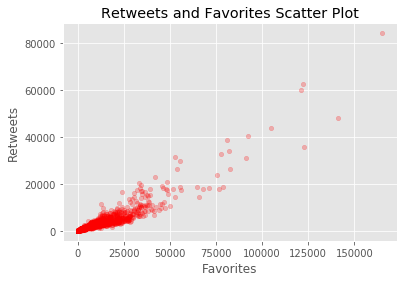

In [10]:
twitter_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.25, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Scatter Plot')


## Predicted Dogs

Text(0,0.5,'Dog Breed')

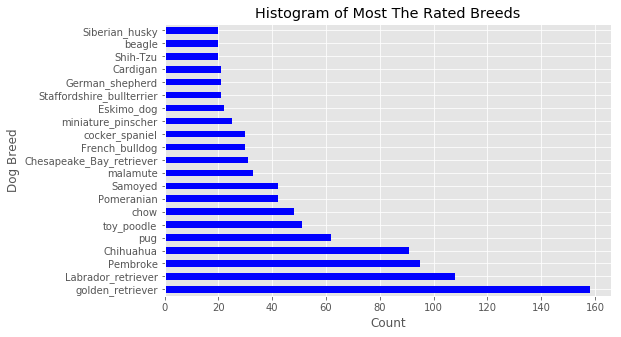

In [17]:
# Top 20 most predicted dogs 
twitter_master['predicted_dog'].value_counts()[:21].plot(kind = 'barh', color = 'blue', figsize = (8,5))
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

## Dog Description

In [38]:
twitter_master[twitter_master['dog_description'] != 'None'].dog_description.value_counts()[:5]

pupper      203
doggo        63
puppo        22
multiple     11
floofer       7
Name: dog_description, dtype: int64

Text(0.5,1,'Average Favorites based on Dog Description')

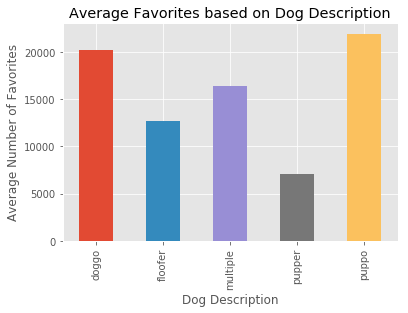

In [49]:
twitter_master[twitter_master['dog_description'] != 'None'].groupby('dog_description')['tweet_favorites'].mean()[1:].plot(kind= 'bar')
plt.xlabel('Dog Description')
plt.ylabel('Average Number of Favorites')
plt.title('Average Favorites based on Dog Description')

Text(0.5,1,'Average Retweets based on Dog Description')

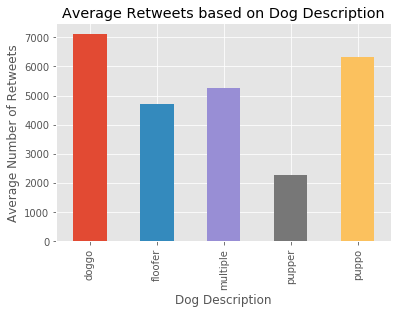

In [50]:
twitter_master[twitter_master['dog_description'] != 'None'].groupby('dog_description')['tweet_retweets'].mean()[1:].plot(kind= 'bar')
plt.xlabel('Dog Description')
plt.ylabel('Average Number of Retweets')
plt.title('Average Retweets based on Dog Description')